In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(8.0, 5.5))
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

In [3]:
from sklearn import preprocessing
from sklearn import ensemble
from sklearn import model_selection
from sklearn import metrics

## Load the Dataset

In [4]:
df = sm.datasets.fair.load_pandas().data
display(df.head())
fair_df = df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


##  Predict Affair or No – Classification

In [5]:
X = fair_df.iloc[:, :-1]
y = fair_df.affairs > 0

print('X:')
display(X.head())

print('y:')
display(y.head())

X:


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


y:


0    True
1    True
2    True
3    True
4    True
Name: affairs, dtype: bool

In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y,
    train_size=0.75,
    test_size=0.25,
    random_state=20191102
)

In [7]:
# m: model
m = ensemble.RandomForestClassifier(n_estimators=100)
%time _ = m.fit(X_train, y_train)

CPU times: user 262 ms, sys: 7.93 ms, total: 270 ms
Wall time: 269 ms


In [8]:
print('Training Set Report')
print()
print(metrics.classification_report(
    y_train, m.predict(X_train)
))

Training Set Report

              precision    recall  f1-score   support

       False       0.94      0.98      0.96      3221
        True       0.95      0.87      0.91      1553

   micro avg       0.94      0.94      0.94      4774
   macro avg       0.95      0.93      0.94      4774
weighted avg       0.95      0.94      0.94      4774



In [9]:
print('Testing Set Report')
print()
print(metrics.classification_report(
    y_test, m.predict(X_test)
))

Testing Set Report

              precision    recall  f1-score   support

       False       0.74      0.80      0.77      1092
        True       0.48      0.40      0.43       500

   micro avg       0.68      0.68      0.68      1592
   macro avg       0.61      0.60      0.60      1592
weighted avg       0.66      0.68      0.67      1592



## Visualize the Result

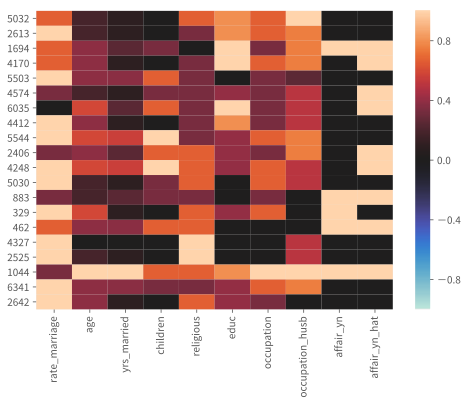

In [10]:
X = X_test.sample(20, random_state=20191102+1)
y_hat = m.predict(X)

df = X
df = df.assign(affair_yn=y_test[X.index].astype(float))
df = df.assign(affair_yn_hat=y_hat.astype(float))

# scale the all features into [0, 1] for a better heatmap
preprocessing.minmax_scale(df, copy=False)

sns.heatmap(df, vmin=-1, center=0, vmax=1)

## Dig More

* [Decision tree – Wikipedia](https://en.wikipedia.org/wiki/Decision_tree)
* [Random forest – Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
* [Precision and recall – Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall)
* [F1 score – Wikipedia](https://en.wikipedia.org/wiki/F1_score)
* [RandomForest – scikit-learn](http://scikit-learn.org/stable/modules/ensemble.html#forest)
* [Scikit-learn Tutorials](http://scikit-learn.org/stable/tutorial/index.html)